In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
import distributed_filter
import pandas as pd
import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
L = 950e-6
r = 1e-6*4
w = 1e-6
s = 1e-6
(
    ns, 
    ls, 
    Ws, 
    Hs, 
    As
) = distributed_filter.generate_series_resonator_params(L, r, r, w, s)

# Plotting Example: One Stage Filter

Series Backtracking: Cleaned in 2 iters. Removed 33 points
Shunt Backtracking: Cleaned in 2 iters. Removed 7 points


(-1.2803315572816616e-05,
 0.0002687928409334421,
 -7.281438892349013e-05,
 3.6153147275168715e-05)

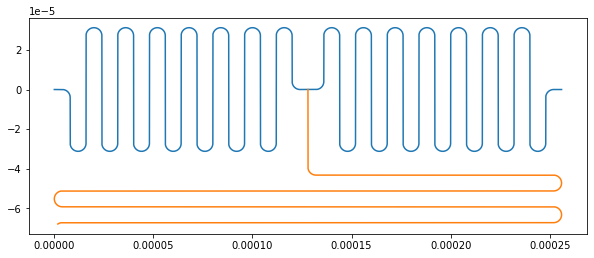

In [25]:
ind = 13
n, l, W, H, A = ns[ind], ls[ind], Ws[ind], Hs[ind], As[ind]
(
    x_series, 
    y_series, 
    x_shunt1, 
    y_shunt1, 
) = distributed_filter.one_stage_filter(
    origin_x=0, 
    origin_y=0, 
    n=n,
    L=L, 
    r=r, 
    l=l, 
    w=w, 
    s=w, 
    x_length=r, 
    shunt_padding=3, 
    n_points_meander=3600,
    clean=True
)
plt.figure(figsize = (10,5))
plt.plot(x_series, y_series)
plt.plot(x_shunt1, y_shunt1)
plt.axis("scaled")

# Plotting Example: Two Stage Filter

Series Backtracking: Cleaned in 2 iters. Removed 50 points
Shunt Backtracking: Cleaned in 2 iters. Removed 5 points
Shunt Backtracking: Cleaned in 2 iters. Removed 5 points


(-2.3403315477613437e-05,
 0.0004033928389341678,
 -6.511257742236522e-05,
 6.511606960351378e-05)

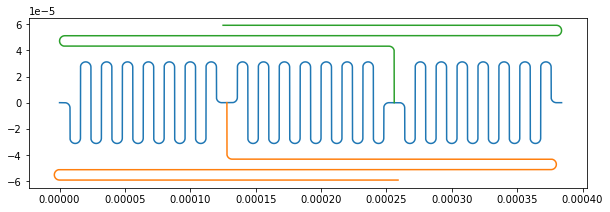

In [27]:
ind = 13
n, l, W, H, A = ns[ind], ls[ind], Ws[ind], Hs[ind], As[ind]

(
    x_series, 
    y_series, 
    x_shunt1, 
    y_shunt1, 
    x_shunt2, 
    y_shunt2
) = distributed_filter.two_stage_filter(
    origin_x=0, 
    origin_y=0, 
    n=n, 
    L=L, 
    r=r, 
    l=l, 
    w=w, 
    s=w, 
    x_length=r, 
    shunt_padding=3, 
    n_points_meander=3600,
    clean=True
)
plt.figure(figsize = (10,5))
plt.plot(x_series, y_series)
plt.plot(x_shunt1, y_shunt1)
plt.plot(x_shunt2, y_shunt2)
plt.axis("scaled")

# Optimisation Example: One Stage Filter

In [10]:
# Set the main parameters
L = 950e-6
r = 1e-6*4
w = 1e-6
s = 1e-6


(
    ns, 
    ls, 
    Ws, 
    Hs, 
    As
) = distributed_filter.generate_series_resonator_params(
    L=L, 
    r=r, 
    x=r, 
    w=w, 
    s=s
)

headings = ["n_meanders", "length", "width", "height", "area"]
params = []
for n, l  in tqdm.tqdm(zip(ns, ls), total=len(ns)):
    (
        x_series, 
        y_series, 
        x_shunt1, 
        y_shunt1, 
    ) = distributed_filter.one_stage_filter(
        origin_x=0, 
        origin_y=0, 
        n=n,
        L=L, 
        r=r, 
        l=l, 
        w=w, 
        s=w, 
        x_length=r, 
        shunt_padding=3, 
        n_points_meander=3600
    )
    W_real = max(x_series)-min(x_series)
    H_real = max(y_shunt1)-min(y_series) + w + 2*s
    A = W_real*H_real
    
    params.append([n, l, W_real, H_real, A])
    
df = pd.DataFrame(params,columns = headings)

  0%|          | 0/75 [00:00<?, ?it/s]

Series Backtracking: Cleaned in 2 iters. Removed 7 points
Shunt 1 Backtracking: Cleaned in 4 iters. Removed 34214 points


ValueError: max() arg is an empty sequence

In [6]:
fig = plt.figure(figsize = (6, 5))
plt.plot(df.n_meanders, df.height/df.width, "r.")
plt.xlabel("# of meanders on series resonator section")
plt.ylabel("Height/Width")
plt.title(f"L={(L/1e-6):.1f}um, w={(w/1e-6):.1f}um, s={(s/1e-6):.1f}um")
plt.hlines(1, xmin=min(df.n_meanders), xmax=max(df.n_meanders))
plt.ylim([0, 1.5])
ind = np.argmin(abs(df.height/df.width - 1))
print(f"n_opt_square = {df.n_meanders[ind]}")

n_opt_square = 9


In [7]:
fig = plt.figure(figsize = (6, 5))
plt.plot(df.n_meanders, df.area/1e-12, "r.")
plt.xlabel("# of meanders on series resonator section")
plt.ylabel("Area (um^2)")
plt.title(f"L={(L/1e-6):.1f}um, w={(w/1e-6):.1f}um, s={(s/1e-6):.1f}um")

Text(0.5, 1.0, 'L=950.0um, w=1.0um, s=1.0um')

In [8]:
print(
    f"""
    n = {df.n_meanders[ind]}
    l = {(df.length[ind]/1e-6):.2f} um
    A = {((df.area/1e-12) [ind]):.2f} um^2
    H = {(df.height[ind]/1e-6):.2f} um
    W = {(df.width[ind]/1e-6):.2f} um
    Aspect_ratio = {(df.height[ind]/df.width[ind]):.2f}
    """
)


    n = 9
    l = 91.59 um
    A = 27207.27 um^2
    H = 154.59 um
    W = 175.99 um
    Aspect_ratio = 0.88
    


In [9]:
fig = plt.figure(figsize=(8,8))
n, l, W, H, A = ns[ind], ls[ind], Ws[ind], Hs[ind], As[ind]

(
    x_series, 
    y_series, 
    x_shunt1, 
    y_shunt1, 
) = distributed_filter.one_stage_filter(
    origin_x=0, 
    origin_y=0, 
    n=n, 
    L=L, 
    r=r, 
    l=l, 
    w=w, 
    s=w, 
    x_length=r, 
    shunt_padding=3, 
    n_points_meander=3600
)
plt.figure(figsize = (10,5))
plt.plot(x_series/1e-6, y_series/1e-6)
plt.plot(x_shunt1/1e-6, y_shunt1/1e-6)
plt.axis("scaled")
plt.ylabel("y (um)")
plt.xlabel("x (um)")

Text(0.5, 0, 'x (um)')

# Metal Layout Code

In [3]:
from qiskit_metal import draw, Dict, designs, MetalGUI
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import distributed_filter
import numpy as np
%matplotlib qt

In [4]:
ind = 10
n, l, W, H, A = ns[ind], ls[ind], Ws[ind], Hs[ind], As[ind]

In [5]:
class CPWOneStage(QComponent):
    component_metadata = Dict(
        short_name='Generic CPW',
        _qgeometry_table_path='True'
    )
    default_options = Dict(
            origin_x=0, 
            origin_y=0, 
            n=n, 
            L=L, 
            r=r, 
            l=l, 
            w=w, 
            s=s, 
            x_length=r, 
            shunt_padding=3, 
            n_points_meander=360,
            trace_gap = "1um",
            trace_width = "1um",
            chip="main",
            layer="1"
    )
    
    TOOLTIP = "Coplanar Waveguide"
    
    def __init__(self,
                 design,
                 name: str = None,
                 options: Dict = None,
                 type: str = "CPW",
                 **kwargs):


        self.type = type.upper().strip()
        
        super().__init__(design, name, options, **kwargs)
        
    def make(self):
        p = self.p
        
        (
            x_series, 
            y_series, 
            x_shunt1, 
            y_shunt1, 
        ) = distributed_filter.one_stage_filter(
            origin_x=p.origin_x, 
            origin_y=p.origin_y, 
            n=p.n, 
            L=p.L, 
            r=p.r, 
            l=p.l, 
            w=p.w, 
            s=p.s, 
            x_length=p.x_length, 
            shunt_padding=p.shunt_padding, 
            n_points_meander=p.n_points_meander
        )
        self.points = np.array([x_series, y_series]).T
        self.qgeometry_table_usage = {'path': True, 'poly': False, 'junction': False}
        self.make_elements(self.points)
    
    def make_elements(self, pts: np.ndarray):
        """Turns the CPW points into design elements, and add them to the
        design object.

        Args:
            pts (np.ndarray): Array of points
        """
        p = self.p
        line = draw.LineString(pts)

        # expand the routing track to form the substrate core of the cpw
        self.add_qgeometry(
                'path', {'trace': line},
                width=p.w,
                layer=p.layer,
                fillet=0
                )
        self.add_qgeometry('path', {'cut': line},
                               width=p.w + 2 * p.s,
                               layer=p.layer,
                               subtract=True,
                               fillet=0
                               )

In [6]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '2mm'
design.chips.main.size['size_y'] = '2mm'
design.delete_all_components()
design.overwrite_enabled = True

In [7]:
#design.delete_all_components()
cpw = CPWOneStage(
        design=design, 
        name="series", 
    )


In [8]:
a_gds = design.renderers.gds
a_gds.options
a_gds.options['path_filename'] = '/home/ashu/qiskit-metal/tutorials/resources/Fake_Junctions.GDS'
a_gds.options['short_segments_to_not_fillet'] = 'False'
scale_fillet = 0.0
a_gds.options['check_short_segments_by_scaling_fillet'] = scale_fillet
#print(a_gds.options)
a_gds.options['max_points'] = '10000'
a_gds.export_to_gds('/home/ashu/Desktop/opts.gds')

1

In [10]:
np.shape(np.array([x_series, y_series]).T)

(86430, 2)